In [1]:
#Importing all necessary packages, setting presents
import pandas
import numpy 
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import scipy 
import statsmodels 
import statsmodels.api as sm
from statsmodels.formula.api import ols
seaborn.set_palette(seaborn.color_palette("hls", 15))

# Taking in data, finding totals & never essentials pre-screening

In [2]:
#Reading in the original data table
data_table = pandas.read_csv("table_Avana2020Q4_CRISPRcleanR_corrected_all", sep='\s+', header=0, index_col=0)
data_table_orig=data_table
data_table

,ACH-001172,ACH-002017,ACH-001145,ACH-000995,ACH-000391,ACH-001674,ACH-001795,ACH-002018,ACH-000172,ACH-000645,...,ACH-001819,ACH-001041,ACH-002399,ACH-002464,ACH-000845,ACH-001574,ACH-002467,ACH-002463,ACH-000602,ACH-002510
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG,-24.971,-5.503,-21.171,-6.261,-17.224,-18.186,-21.752,-26.337,-2.121,-23.069,...,-31.675,-10.494,-12.439,-22.723,-10.896,-13.444,-10.789,-20.144,-21.737,-12.560
A1CF,-31.667,-0.874,-14.970,-10.729,-14.296,-24.983,-35.797,-24.425,-5.806,-29.454,...,-23.541,-29.790,-11.197,-24.534,-15.655,-23.113,-12.627,-23.998,-16.273,-15.189
A2M,-22.225,-3.130,-21.386,-2.465,-7.090,-13.480,-26.093,-15.808,-5.056,-19.130,...,-14.210,-12.345,-7.700,-15.693,-9.705,-11.160,-9.164,-16.173,-13.433,-9.381
A2ML1,-24.321,-4.201,-19.018,-6.694,-14.284,-28.333,-31.233,-30.548,-11.586,-30.685,...,-27.153,-23.554,-9.729,-25.384,-23.047,-10.062,-7.756,-17.342,-23.792,-13.412
A3GALT2,-34.045,2.779,-30.668,-4.260,-10.986,-20.955,-35.197,-27.707,-10.419,-36.869,...,-30.308,-20.827,-10.385,-17.021,-9.150,-15.244,-5.864,-21.941,-24.924,-14.997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-21.016,-1.137,-28.243,-13.883,-18.694,-16.295,-33.735,-28.373,-8.748,-24.447,...,-28.580,-21.986,-18.452,-30.317,-18.271,-17.527,-8.530,-32.076,-23.269,-11.177
ZYG11B,-18.207,-0.937,-14.866,-4.122,1.181,-18.023,-27.448,-14.942,-2.062,-15.660,...,-7.842,-28.336,-8.439,-6.154,-7.554,-16.743,-4.350,-13.164,-29.058,-11.529
ZYX,-29.713,-1.988,-22.777,-12.908,-16.376,-22.267,-7.531,-28.319,-4.621,-8.955,...,-21.805,-16.321,-10.895,-9.066,-18.099,-10.491,-5.571,-1.564,-28.063,-9.684


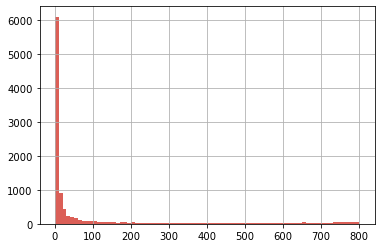

In [3]:
#How many cell lines is a gene essential in? Essential = BF>5
data_table = data_table.mask(data_table<5, 0)
data_table_masked = data_table.mask(data_table>0, 1)
sum_table = data_table_masked.sum(1).to_frame()
plt = data_table_masked.sum(1).hist(bins=numpy.arange(1,811,10))

In [4]:
#Getting a list of never-essential genes
sum_table.columns=['totals']
never_essential_unf = sum_table.query('totals==0')
print(never_essential_unf)

        totals
Genes         
A1BG       0.0
A2M        0.0
A2ML1      0.0
A4GALT     0.0
A4GNT      0.0
...        ...
ZSWIM2     0.0
ZSWIM3     0.0
ZXDC       0.0
ZYG11A     0.0
ZYX        0.0

[7439 rows x 1 columns]


# Cohen's D Statistic - Quality Filter CRISPR Screens

In [5]:
#Using sets of ref essential and nonessential data- prepping data/import into pandas 
reference_essential = pandas.read_csv("CEGv2.txt", sep='\s+', header=0, index_col=0)
reference_nonessential = pandas.read_csv("NEGv1.txt", sep='\s+', header=0, index_col=0)
ref_ess_data = pandas.DataFrame(columns=data_table_orig.columns)
ref_noness_data = pandas.DataFrame(columns=data_table_orig.columns)        

In [6]:
#For each matching gene, adding in data from original dataset
for gene in data_table_orig.index:
    if gene in reference_essential.index:
        ref_ess_data[gene] = data_table_orig.loc[gene]
    elif gene in reference_nonessential.index:
        ref_noness_data[gene] = data_table_orig.loc[gene]

In [7]:
#Formatting the tables
ref_ess_data = ref_ess_data.dropna(axis=1)
ref_noness_data = ref_noness_data.dropna(axis=1)
ref_ess_data['D'] = ''
ref_noness_data['D'] = ''

In [8]:
#How many reference essentials are not present in the AVANA dataset?
ne = 0
for ess_gene in reference_essential.index:
    if ess_gene not in data_table.index:
        ne+=1
ne

45

In [9]:
#How many reference nonessentials are not present in the AVANA dataset?
rne = 0
for ne_gene in reference_nonessential.index:
    if ne_gene not in data_table.index:
        rne+=1
rne

128

In [10]:
#Preparing table stats for calculating D statistic
ref_noness_data['std']=ref_noness_data.std(axis=1)
ref_noness_data['mean'] = ref_noness_data.mean(axis=1)
ref_ess_data['std']=ref_ess_data.std(axis=1)
ref_ess_data['mean'] = ref_ess_data.mean(axis=1)

In [11]:
#Calculating Cohen's D statistic
for screen in ref_ess_data.index:
    D_numerator = ref_ess_data.loc[screen]['mean']- ref_noness_data.loc[screen]['mean']
    D_denominator = numpy.sqrt(((ref_ess_data.loc[screen]['std'])**2+(ref_noness_data.loc[screen]['std'])**2)/2)
    D = D_numerator/D_denominator
    ref_ess_data.loc[screen, 'D'] = D

In [12]:
#Valid screens have a D score greater than 2... Unqualified screens are removed (81 screens / approx 10%)
valid_data= ref_ess_data.query('D>2.0')
valid_data
data_table_screened = data_table_orig
for col in data_table_screened.columns:
    if col not in valid_data.index:
        data_table_screened.drop(labels=col, axis=1, inplace=True)
data_table_screened

,ACH-001172,ACH-001145,ACH-000995,ACH-000391,ACH-001674,ACH-001795,ACH-002018,ACH-000172,ACH-000645,ACH-001099,...,ACH-000533,ACH-001819,ACH-001041,ACH-002399,ACH-000845,ACH-001574,ACH-002467,ACH-002463,ACH-000602,ACH-002510
Genes,,,,,,,,,,,,,,,,,,,,,
A1BG,-24.971,-21.171,-6.261,-17.224,-18.186,-21.752,-26.337,-2.121,-23.069,-10.032,...,-9.329,-31.675,-10.494,-12.439,-10.896,-13.444,-10.789,-20.144,-21.737,-12.560
A1CF,-31.667,-14.970,-10.729,-14.296,-24.983,-35.797,-24.425,-5.806,-29.454,-10.995,...,-9.165,-23.541,-29.790,-11.197,-15.655,-23.113,-12.627,-23.998,-16.273,-15.189
A2M,-22.225,-21.386,-2.465,-7.090,-13.480,-26.093,-15.808,-5.056,-19.130,-8.048,...,-8.015,-14.210,-12.345,-7.700,-9.705,-11.160,-9.164,-16.173,-13.433,-9.381
A2ML1,-24.321,-19.018,-6.694,-14.284,-28.333,-31.233,-30.548,-11.586,-30.685,-10.597,...,-14.386,-27.153,-23.554,-9.729,-23.047,-10.062,-7.756,-17.342,-23.792,-13.412
A3GALT2,-34.045,-30.668,-4.260,-10.986,-20.955,-35.197,-27.707,-10.419,-36.869,-9.734,...,-11.306,-30.308,-20.827,-10.385,-9.150,-15.244,-5.864,-21.941,-24.924,-14.997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-21.016,-28.243,-13.883,-18.694,-16.295,-33.735,-28.373,-8.748,-24.447,-5.916,...,-14.085,-28.580,-21.986,-18.452,-18.271,-17.527,-8.530,-32.076,-23.269,-11.177
ZYG11B,-18.207,-14.866,-4.122,1.181,-18.023,-27.448,-14.942,-2.062,-15.660,-6.041,...,-6.669,-7.842,-28.336,-8.439,-7.554,-16.743,-4.350,-13.164,-29.058,-11.529
ZYX,-29.713,-22.777,-12.908,-16.376,-22.267,-7.531,-28.319,-4.621,-8.955,-9.266,...,-12.719,-21.805,-16.321,-10.895,-18.099,-10.491,-5.571,-1.564,-28.063,-9.684


In [13]:
#Redoing the histogram from earlier with screened data
data_table2_s = data_table_screened.mask(data_table<5, 0)
data_table_masked_s = data_table2_s.mask(data_table>0, 1)
sum_table_s = data_table_masked_s.sum(1).to_frame()

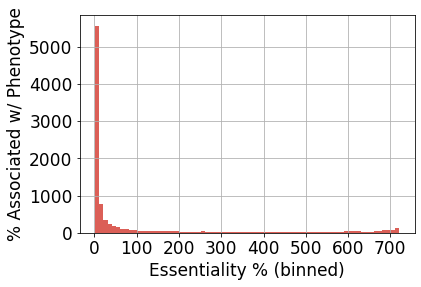

In [14]:
ax1 = data_table_masked_s.sum(1).hist(bins=numpy.arange(1,730,10))
ax1.set_ylabel('% Associated w/ Phenotype')
ax1.set_xlabel('Essentiality % (binned)')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(17)

In [15]:
#Sum table should include filtered gene essentiality totals as well
sum_table_s.columns=['filtered_totals']
sum_table = sum_table.join(sum_table_s, how='left')
sum_table

,totals,filtered_totals
Genes,,
A1BG,0.0,0.0
A1CF,1.0,1.0
A2M,0.0,0.0
A2ML1,0.0,0.0
A3GALT2,2.0,1.0
...,...,...
ZYG11A,0.0,0.0
ZYG11B,11.0,8.0
ZYX,0.0,0.0


In [16]:
#A list of never essential genes (Essential in 2 or fewer cell lines)
zeros = sum_table.query('totals<=2')
zeros

,totals,filtered_totals
Genes,,
A1BG,0.0,0.0
A1CF,1.0,1.0
A2M,0.0,0.0
A2ML1,0.0,0.0
A3GALT2,2.0,1.0
...,...,...
ZUP1,1.0,1.0
ZXDA,2.0,1.0
ZXDC,0.0,0.0


# Energetics - ECPAA, TC 

In [17]:
#Reading in the file with pre-determined normalized and total energetic costs
#Code for how this was calculated in a separate notebook 
#(See folder gene_to_amino, notebook 'Gene to amino energetic cost.ipynb')
ecpaa_tc = pandas.read_csv("all_genes-length-EPCAA_TC.csv", sep=',', header=0, index_col=0)
ecpaa_tc = ecpaa_tc.drop(columns='totals')

In [18]:
#Join this with filtered gene essentiality totals data
merged = sum_table_s.join(ecpaa_tc, how='inner')
merged

,filtered_totals,ECPAA,TC,length
Genes,,,,
A1BG,0.0,130.544444,64619.5,495.0
A1CF,1.0,133.293771,79176.5,594.0
A2M,0.0,141.893148,209150.5,1474.0
A2ML1,0.0,145.054677,210909.5,1454.0
A3GALT2,1.0,161.686765,54973.5,340.0
...,...,...,...,...
ZYG11A,0.0,156.100791,118480.5,759.0
ZYG11B,8.0,150.163978,111722.0,744.0
ZYX,0.0,130.070804,74400.5,572.0


In [19]:
#Removing never essential genes
all_but_never = sum_table.query('filtered_totals>2')
all_but_never
all_but_never['filtered_totals-9'] = pandas.qcut(all_but_never['filtered_totals'], q=9)
all_but_never

<ipython-input-19-3bdd9e6e19c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_but_never['filtered_totals-9'] = pandas.qcut(all_but_never['filtered_totals'], q=9)


,totals,filtered_totals,filtered_totals-9
Genes,,,
AAAS,137.0,134.0,"(98.667, 292.778]"
AAK1,10.0,9.0,"(6.0, 9.0]"
AAMP,511.0,483.0,"(292.778, 592.889]"
AAR2,7.0,7.0,"(6.0, 9.0]"
AARS1,791.0,720.0,"(592.889, 727.0]"
...,...,...,...
ZWINT,307.0,303.0,"(292.778, 592.889]"
ZXDB,6.0,4.0,"(2.999, 4.0]"
ZYG11B,11.0,8.0,"(6.0, 9.0]"


In [20]:
#Binning all contextual and core essential genes into 9 bins based on filtered total numbers
nonzero_merged= all_but_never.join(ecpaa_tc, how='left')
nonzero_merged['filtered_totals-9'] = pandas.qcut(nonzero_merged['filtered_totals'], q=9, labels=[1,2,3,4,5,6,7,8,9])
nonzero_merged.drop(columns=['totals','filtered_totals', 'ECPAA', 'length', 'TC'], inplace=True)

In [21]:
#Seeing how many genes are in each bin
nonzero_merged['filtered_totals-9'].value_counts()

1    1091
9     745
7     744
8     744
6     739
5     718
4     703
3     611
2     603
Name: filtered_totals-9, dtype: int64

In [22]:
#Making overall table for figure purposes
masterlist = merged.merge(nonzero_merged, how='left', left_index=True, right_index=True)
masterlist
masterlist['filtered_totals-9'] = masterlist['filtered_totals-9'].cat.add_categories('0').fillna('0')
all_genes_energetics = merged.merge(nonzero_merged, how='left', left_index=True, right_index=True)
bins = masterlist['filtered_totals-9'].value_counts()

In [23]:
#Making categories for graphing, returning never-essentials to bin 0
all_genes_energetics['filtered_totals-9'] = all_genes_energetics['filtered_totals-9'].cat.add_categories('0').fillna('0')
all_genes_energetics.rename(columns={"filtered_totals-9":'Essentiality %'}, inplace=True)
all_genes_energetics['Essentiality %.'] = all_genes_energetics['Essentiality %']
#all_genes_energetics['Essentiality %'].rename_categories({'(0,0]':'0', '(2.999, 4.0]':'1', '(4.0, 6.0]':'2', '(6.0, 9.0]':'3','(9.0, 16.0]':'4', '(592.889, 727.0]':'10'})

Text(0.5, 0, '% Esentiality (binned)')

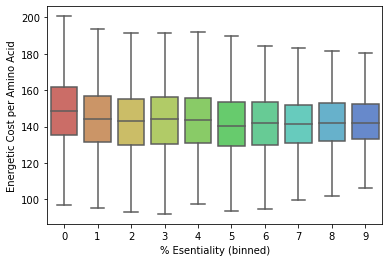

In [24]:
ax=seaborn.boxplot(data=all_genes_energetics, x='Essentiality %', y='ECPAA', showfliers=False,order=['0',1,2,3,4,5,6,7,8,9])
ax.set_ylabel("Energetic Cost per Amino Acid")
ax.set_xlabel("% Esentiality (binned)")

Text(0.5, 0, '% Esentiality (binned)')

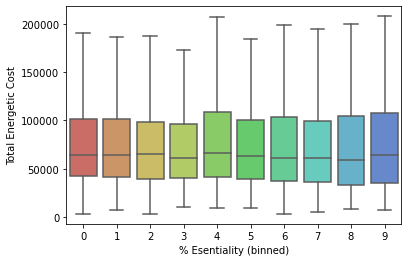

In [25]:
ax2=seaborn.boxplot(data=all_genes_energetics, x='Essentiality %', y='TC', showfliers=False, order=['0',1,2,3,4,5,6,7,8,9])
ax2.set_ylabel("Total Energetic Cost")
ax2.set_xlabel("% Esentiality (binned)")

# Exomes- LOEUF

In [27]:
#Reading in gnomad dataset
gnomad = pandas.read_csv("gnomad_table.txt", sep='\s+', header=0, index_col=0)
gnomad

,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,possible_mis_pphen,...,gene_type,gene_length,exac_pLI,exac_obs_lof,exac_exp_lof,exac_oe_lof,brain_expression,chromosome,start_position,end_position
gene,,,,,,,,,,,,,,,,,,,,,
MED13,ENST00000397786,871,1117.80,0.77921,0.000056,14195,314.0,529.750,0.59273,6708.0,...,122678,1.0,0.000000e+00,64.393,0.000000,NaN,17,60019966,60142643,NaN
NIPBL,ENST00000282516,846,1441.50,0.58688,0.000074,18540,158.0,543.100,0.29092,7135.0,...,189655,1.0,1.000000e+00,110.570,0.009044,NaN,5,36876861,37066515,NaN
SMC3,ENST00000361804,178,630.07,0.28251,0.000032,8109,21.0,182.520,0.11506,2197.0,...,36946,1.0,0.000000e+00,58.523,0.000000,NaN,10,112327449,112364394,NaN
CNOT1,ENST00000317147,561,1295.90,0.43290,0.000069,15670,51.0,290.680,0.17545,3560.0,...,109936,1.0,3.000000e+00,90.130,0.033285,NaN,16,58553855,58663790,NaN
RLF,ENST00000372771,669,972.87,0.68766,0.000047,12682,107.0,321.140,0.33319,4151.0,...,79549,1.0,0.000000e+00,43.607,0.000000,NaN,1,40627045,40706593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR7G2,ENST00000305456,177,181.12,0.97723,0.000009,2247,34.0,38.175,0.89064,585.0,...,protein_coding,1038.0,7.093800e-03,3.000,2.963500,1.01230,NaN,19,9212945,9213982.0
OR7G3,ENST00000305444,164,163.92,1.00050,0.000008,2016,40.0,39.403,1.01520,551.0,...,protein_coding,939.0,4.059600e-01,1.000,4.840100,0.20661,NaN,19,9236688,9237626.0
OR8D1,ENST00000357821,178,162.04,1.09850,0.000008,2002,65.0,54.179,1.19970,710.0,...,protein_coding,1026.0,2.159200e-01,1.000,2.743600,0.36448,NaN,11,124179708,124180733.0


In [28]:
gene_list =pandas.read_csv('filtered_totals_ECPAA_TC_length.csv', index_col=0, header=0)
gene_list

,filtered_totals,ECPAA,TC,length
Genes,,,,
A1BG,0.0,130.544444,64619.5,495.0
A1CF,1.0,133.293771,79176.5,594.0
A2M,0.0,141.893148,209150.5,1474.0
A2ML1,0.0,145.054677,210909.5,1454.0
A3GALT2,1.0,161.686765,54973.5,340.0
...,...,...,...,...
ZYG11A,0.0,156.100791,118480.5,759.0
ZYG11B,8.0,150.163978,111722.0,744.0
ZYX,0.0,130.070804,74400.5,572.0


In [29]:
#Combining datasets for figure drawing
merged = gnomad.join(gene_list, how='inner')
binned_gnomad = merged.merge(all_genes_energetics, how='left', right_index=True, left_index=True)
binned_gnomad

,transcript,obs_mis,exp_mis,oe_mis,mu_mis,possible_mis,obs_mis_pphen,exp_mis_pphen,oe_mis_pphen,possible_mis_pphen,...,filtered_totals_x,ECPAA_x,TC_x,length_x,filtered_totals_y,ECPAA_y,TC_y,length_y,Essentiality %,Essentiality %.
A1BG,ENST00000263100,298,293.85,1.01410,0.000019,3115,104.0,101.390,1.02570,1127.0,...,0.0,130.544444,64619.5,495.0,0.0,130.544444,64619.5,495.0,0,0
A1CF,ENST00000373995,274,324.18,0.84521,0.000016,3829,100.0,138.390,0.72259,1659.0,...,1.0,133.293771,79176.5,594.0,1.0,133.293771,79176.5,594.0,0,0
A2M,ENST00000318602,627,773.45,0.81065,0.000040,9524,109.0,167.800,0.64960,2089.0,...,0.0,141.893148,209150.5,1474.0,0.0,141.893148,209150.5,1474.0,0,0
A2ML1,ENST00000299698,766,791.90,0.96729,0.000041,9472,183.0,202.780,0.90244,2583.0,...,0.0,145.054677,210909.5,1454.0,0.0,145.054677,210909.5,1454.0,0,0
A3GALT2,ENST00000442999,170,171.71,0.99002,0.000011,2110,41.0,38.657,1.06060,523.0,...,1.0,161.686765,54973.5,340.0,1.0,161.686765,54973.5,340.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,ENST00000371528,299,364.61,0.82006,0.000018,4992,71.0,83.267,0.85268,1223.0,...,0.0,156.100791,118480.5,759.0,0.0,156.100791,118480.5,759.0,0,0
ZYG11B,ENST00000294353,176,400.25,0.43972,0.000021,4902,27.0,76.350,0.35363,970.0,...,8.0,150.163978,111722.0,744.0,8.0,150.163978,111722.0,744.0,3,3
ZYX,ENST00000322764,354,344.52,1.02750,0.000019,3652,98.0,111.050,0.88245,1174.0,...,0.0,130.070804,74400.5,572.0,0.0,130.070804,74400.5,572.0,0,0
ZZEF1,ENST00000381638,1534,1653.80,0.92759,0.000095,19343,459.0,608.090,0.75482,7365.0,...,9.0,151.020432,447171.5,2961.0,9.0,151.020432,447171.5,2961.0,3,3


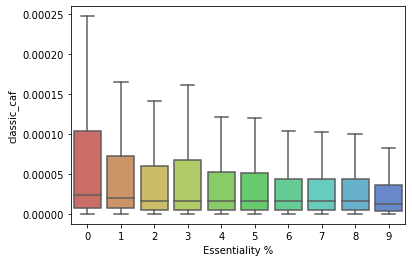

In [30]:
#Classic caf for each bin - no significant difference in bin means
a = seaborn.boxplot(x='Essentiality %', y='classic_caf', data=binned_gnomad, showfliers=False, order=['0',1,2,3,4,5,6,7,8,9])

Text(0.5, 0, 'Essentiality % (binned)')

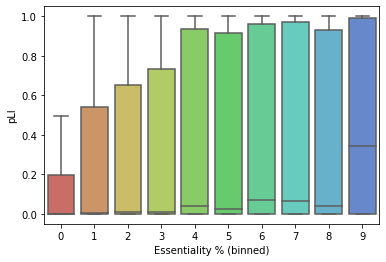

In [32]:
#pLI for each bin
a = seaborn.boxplot(x='Essentiality %', y='pLI', data=binned_gnomad, showfliers=False, order=['0',1,2,3,4,5,6,7,8,9])
a.set_ylabel('pLI')
a.set_xlabel('Essentiality % (binned)')

Text(0.5, 0, 'Essentiality % (binned)')

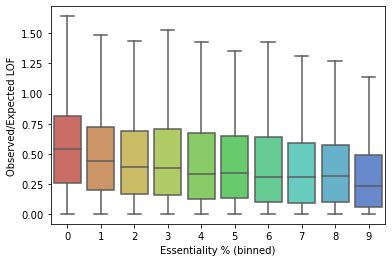

In [33]:
#oe/lof ratio for all bins
a2 = seaborn.boxplot(x='Essentiality %', y='oe_lof', data=binned_gnomad, showfliers=False, order=['0',1,2,3,4,5,6,7,8,9])
a2.set_ylabel('Observed/Expected LOF')
a2.set_xlabel('Essentiality % (binned)')

### Interpreting oe_lof
oe is observed/expected loss of function
Continuous measure (as opposed to pLI (which is more discrete). oe 0.4 means only 40% of expected loss of function variants were observed, under selection AGAINST lof variants. 

oe includes a 90% CI (distinguish cases where there is uncertainty of the constraint due to sample size)

So never-essential genes have way higher observed compared to expected - selecting FOR lof variants
Decreases you get more essential, as expected (less observed compared to expected- under selection AGAINST lof variants, as expected)

In [34]:
binned_gnomad['Ess'] = binned_gnomad['Essentiality %']

In [35]:
#Statistical significance testing
mod = ols('oe_lof ~ Ess', data=binned_gnomad).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq       df          F         PR(>F)
Ess        118.748434      9.0  86.644711  2.434178e-158
Residual  2581.148717  16950.0        NaN            NaN


In [36]:
binned_gnomad.loc[(binned_gnomad['Ess']=='0'), 'pLI']

A1BG       4.991700e-09
A1CF       5.921800e-10
A2M        4.522900e-11
A2ML1      1.610900e-34
A3GALT2    1.282300e-10
               ...     
ZSWIM6     1.000000e+00
ZXDA       4.372300e-03
ZXDC       1.144900e-09
ZYG11A     1.257300e-11
ZYX        2.030700e-10
Name: pLI, Length: 10867, dtype: float64

In [37]:
#t-test
scipy.stats.ttest_ind(a=binned_gnomad.loc[(binned_gnomad['Ess']=='0'), 'pLI'], b=binned_gnomad.loc[(binned_gnomad['Ess']==9), 'pLI'])

Ttest_indResult(statistic=nan, pvalue=nan)

# GWAS Project

In [80]:
#Reading in GWAS project dataset
gwas = pandas.read_table('gwas_catalog_v1.0-associations_e104_r2021-07-08.tsv', header=0, low_memory=False)
gwas

,rackDATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,INITIAL SAMPLE SIZE,REPLICATION SAMPLE SIZE,...,CONTEXT,INTERGENIC,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,2018-07-24,26426971,Winkler TW,2015-10-01,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/26426971,The Influence of Age and Sex on Genetic Associ...,Body mass index x sex x age interaction (4df t...,"up to 51,625 European ancestry men aged <50, u...",NaN,...,intron_variant,0.0,0.39,2.000000e-187,186.698970,NaN,NaN,NaN,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N
1,2018-07-24,26426971,Winkler TW,2015-10-01,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/26426971,The Influence of Age and Sex on Genetic Associ...,Body mass index x sex x age interaction (4df t...,"up to 51,625 European ancestry men aged <50, u...",NaN,...,intergenic_variant,1.0,0.83,5.000000e-75,74.301030,NaN,NaN,NaN,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N
2,2018-07-24,26426971,Winkler TW,2015-10-01,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/26426971,The Influence of Age and Sex on Genetic Associ...,Body mass index x sex x age interaction (4df t...,"up to 51,625 European ancestry men aged <50, u...",NaN,...,intergenic_variant,1.0,0.28,9.000000e-60,59.045757,NaN,NaN,NaN,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N
3,2018-07-24,26426971,Winkler TW,2015-10-01,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/26426971,The Influence of Age and Sex on Genetic Associ...,Body mass index x sex x age interaction (4df t...,"up to 51,625 European ancestry men aged <50, u...",NaN,...,intron_variant,0.0,0.47,5.000000e-26,25.301030,NaN,NaN,NaN,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N
4,2018-07-24,26426971,Winkler TW,2015-10-01,PLoS Genet,www.ncbi.nlm.nih.gov/pubmed/26426971,The Influence of Age and Sex on Genetic Associ...,Body mass index x sex x age interaction (4df t...,"up to 51,625 European ancestry men aged <50, u...",NaN,...,intron_variant,0.0,0.83,1.000000e-12,12.000000,NaN,NaN,NaN,"Affymetrix, Illumina, Perlegen [up to 2800000]...",N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272605,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,intron_variant,0.0,0.963504,3.000000e-08,7.522879,(6 ms),0.083091,[0.053-0.113] unit increase,Affymetrix [10000000] (imputed),N
272606,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,intron_variant,0.0,0.963504,5.000000e-08,7.301030,(10 ms),0.081970,[0.052-0.112] unit increase,Affymetrix [10000000] (imputed),N
272607,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,intron_variant,0.0,0.963504,1.000000e-08,8.000000,(8 ms),0.085389,[0.055-0.116] unit increase,Affymetrix [10000000] (imputed),N
272608,2020-11-30,32916098,Verweij N,2020-09-02,Cell Syst,www.ncbi.nlm.nih.gov/pubmed/32916098,The Genetic Makeup of the Electrocardiogram.,Electrocardiogram morphology (amplitude at tem...,"63,706 European and unknown ancestry individuals",NaN,...,intergenic_variant,1.0,0.791595,7.000000e-09,8.154902,(322 ms),0.038484,[0.025-0.052] unit increase,Affymetrix [10000000] (imputed),N


In [81]:
#Each row contains multiple genes- exploding so that each gene gets its own row
gwas = gwas.assign(appearances=gwas['REPORTED GENE(S)'].str.split(', ')).explode('appearances')
gene_occurrences = gwas['appearances'].value_counts()
gene_occurrences
totals = pandas.read_csv('filtered_totals_ECPAA_TC_length.csv', index_col=0, header=0)

In [82]:
#1407 of 18111 genes in the GWAS catalog also appear in the AVANA dataset
#all other genes from AVANA have 0 appearances
pheno_overlap = totals.merge(gene_occurrences, how='left', left_index=True, right_index=True)
pheno_overlap['appearances']=pheno_overlap['appearances'].fillna(0)
pheno_overlap

,filtered_totals,ECPAA,TC,length,appearances
Genes,,,,,
A1BG,0.0,130.544444,64619.5,495.0,0.0
A1CF,1.0,133.293771,79176.5,594.0,27.0
A2M,0.0,141.893148,209150.5,1474.0,1.0
A2ML1,0.0,145.054677,210909.5,1454.0,5.0
A3GALT2,1.0,161.686765,54973.5,340.0,1.0
...,...,...,...,...,...
ZYG11A,0.0,156.100791,118480.5,759.0,7.0
ZYG11B,8.0,150.163978,111722.0,744.0,1.0
ZYX,0.0,130.070804,74400.5,572.0,6.0


In [83]:
#Masking gene phenotype association data- whether or not they appear in the GWAS dataset 
p = pheno_overlap.drop(columns=['filtered_totals', 'ECPAA', 'TC', 'length'])
p['apps-masked'] = p['appearances'].astype(bool).astype(int)
p = p.join(masterlist, how='inner')
p.drop(columns='filtered_totals-9', inplace=True)

In [84]:
#Separating never-essentials out of the other data
p_zeros = p.query('filtered_totals<=2')
p = p.query('filtered_totals>2')

In [89]:
#Binning non never-essential genes, putting never essentials in 1 bin & combining all data
p['filtered_totals-9'] = pandas.qcut(p['filtered_totals'], q=9, labels=[1,2,3,4,5,6,7,8,9])
p_zeros['filtered_totals-9'] = 0
p_zeros['filtered_totals-9'] = p_zeros['filtered_totals-9'].astype("category")
p_all = pandas.concat([p, p_zeros], join='outer')

category


In [94]:
#Finding % of phenotyped genes in each bin
p_sum =  p_all.groupby('filtered_totals-9').sum()
p_sum['apps-masked-%']=p_sum['apps-masked'].divide(p_all.groupby('filtered_totals-9').size())

<AxesSubplot:xlabel='filtered_totals-9', ylabel='apps-masked-%'>

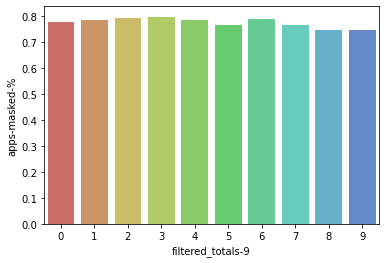

In [97]:
seaborn.barplot(data=p_sum, x=p_sum.index, y='apps-masked-%', order=[0,1,2,3,4,5,6,7,8,9])

# Morbidity / OMIM / Disease Phenotype Association

In [49]:
#Reading in dataset of OMIM Morbid Map
morbid = pandas.read_table('mm2.txt', header=0, sep='\t')

#Putting each gene on its own row in the table, calculating total number of appearances in OMIM databases
morbid = morbid.assign(appearances=morbid['Gene Symbols'].str.split(', ')).explode('appearances')
morbid.groupby(['appearances']).sum()
mim_occurrences = morbid['appearances'].value_counts()

In [50]:
morbid_overlap2 = sum_table.merge(mim_occurrences, how='inner', left_index=True, right_index=True)
morbid_overlap2

,totals,filtered_totals,appearances
A2ML1,0.0,0.0,1
A4GALT,0.0,0.0,3
AAAS,137.0,134.0,1
AAGAB,2.0,2.0,1
AARS1,791.0,720.0,2
...,...,...,...
ZP1,0.0,0.0,1
ZP2,0.0,0.0,1
ZP3,10.0,10.0,1
ZPR1,775.0,716.0,1


In [51]:
morbid_overlap3 = sum_table.merge(mim_occurrences, how='left', left_index=True, right_index=True)
morbid_overlap4 = morbid_overlap3
#To eliminate errors in calculating bin-wise disease % later, mask gene appearance totals (any OMIM appearance=1)
morbid_overlap4['masked_app'] = morbid_overlap3['appearances'].notnull().astype('int')
morbid_overlap4['appearances'] = morbid_overlap3['appearances']
morbid_overlap4

,totals,filtered_totals,appearances,masked_app
Genes,,,,
A1BG,0.0,0.0,NaN,0
A1CF,1.0,1.0,NaN,0
A2M,0.0,0.0,NaN,0
A2ML1,0.0,0.0,1.0,1
A3GALT2,2.0,1.0,NaN,0
...,...,...,...,...
ZYG11A,0.0,0.0,NaN,0
ZYG11B,11.0,8.0,NaN,0
ZYX,0.0,0.0,NaN,0


In [52]:
#For all non- never-essential genes, bin for 9 and 11 bins
es_ish = morbid_overlap4.query('filtered_totals>2')
es_ish['9'] = pandas.qcut(es_ish['filtered_totals'], q=9, labels=[1,2,3,4,5,6,7,8,9])
es_ish['11'] = pandas.qcut(es_ish['totals'], q=11, labels=[1,2,3,4,5,6,7,8,9,10,11])
es_ish.drop(columns=['totals','filtered_totals', 'appearances', 'masked_app'], inplace=True)
morbid_overlap4 = morbid_overlap4.merge(es_ish, how='left', left_index=True, right_index=True)
morbid_overlap4

<ipython-input-52-914e5d96049a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es_ish['9'] = pandas.qcut(es_ish['filtered_totals'], q=9, labels=[1,2,3,4,5,6,7,8,9])
<ipython-input-52-914e5d96049a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  es_ish['11'] = pandas.qcut(es_ish['totals'], q=11, labels=[1,2,3,4,5,6,7,8,9,10,11])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

,totals,filtered_totals,appearances,masked_app,9,11
Genes,,,,,,
A1BG,0.0,0.0,NaN,0,NaN,NaN
A1CF,1.0,1.0,NaN,0,NaN,NaN
A2M,0.0,0.0,NaN,0,NaN,NaN
A2ML1,0.0,0.0,1.0,1,NaN,NaN
A3GALT2,2.0,1.0,NaN,0,NaN,NaN
...,...,...,...,...,...,...
ZYG11A,0.0,0.0,NaN,0,NaN,NaN
ZYG11B,11.0,8.0,NaN,0,3,4
ZYX,0.0,0.0,NaN,0,NaN,NaN


In [53]:
#Filling in categories for never essential genes
morbid_overlap4['9'] = morbid_overlap4['9'].cat.add_categories('0').fillna('0')
morbid_overlap4['11'] = morbid_overlap4['11'].cat.add_categories('0').fillna('0')
morbid_overlap4

,totals,filtered_totals,appearances,masked_app,9,11
Genes,,,,,,
A1BG,0.0,0.0,NaN,0,0,0
A1CF,1.0,1.0,NaN,0,0,0
A2M,0.0,0.0,NaN,0,0,0
A2ML1,0.0,0.0,1.0,1,0,0
A3GALT2,2.0,1.0,NaN,0,0,0
...,...,...,...,...,...,...
ZYG11A,0.0,0.0,NaN,0,0,0
ZYG11B,11.0,8.0,NaN,0,3,4
ZYX,0.0,0.0,NaN,0,0,0


In [54]:
#Checking bin sizes for 10-bin split
print(morbid_overlap4.groupby('9').size())
#Summing up genes with at least one OMIM appearance per bin
z = morbid_overlap4.groupby('9').sum()
z

9
1     1091
2      603
3      611
4      703
5      718
6      739
7      744
8      744
9      745
0    11413
dtype: int64


,totals,filtered_totals,appearances,masked_app
9,,,,
1,4925.0,3721.0,463.0,270
2,4185.0,3294.0,300.0,169
3,6005.0,4825.0,251.0,160
4,10650.0,8861.0,350.0,208
5,20370.0,17649.0,305.0,200
6,49225.0,45211.0,406.0,260
7,142994.0,135856.0,374.0,251
8,348104.0,331693.0,333.0,234
9,537136.0,501918.0,273.0,201


In [55]:
#Calculating bin OMIM percentages (% genes in bin that are OMIM genes)
z['masked_app_percent'] = z['masked_app'].divide(morbid_overlap4.groupby('9').size())

Text(0.5, 0, 'Essentiality % (binned)')

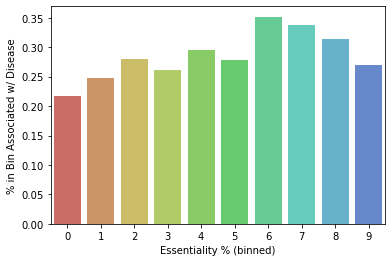

In [63]:
#fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,15))
ax1 = seaborn.barplot(data=z, x=z.index, y='masked_app_percent', order=['0',1,2,3,4,5,6,7,8,9])
ax1.set_ylabel('% in Bin Associated w/ Disease')
ax1.set_xlabel('Essentiality % (binned)')
#for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
#             ax1.get_xticklabels() + ax1.get_yticklabels()):
#    item.set_fontsize(17)